# **Sales Data Analysis**
Analyzing sales data can generate valuable insights into a business's trends, performance, and opportunities. Analyzing this dataset, which comprises transaction data from a portion of Amazon's Electronics Products Sales, we can acquire a thorough and rapid understanding of the business's dynamics.
Data Source:https://www.kaggle.com/datasets/knightbearr/sales-product-data

## Data Preparation


### Import Required Libraries 

In [4937]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt

### Create Reusable Functions


**Seperation Lines**

In [4938]:
# Create function for generating separation lines
def print_divider():
    print("")
    print(
        "-------------------------------------------------------------------------------------------"
    )
    print("")

# Check function
print_divider()



-------------------------------------------------------------------------------------------



**Thousand Separators**

In [4939]:
# Create function for inserting commas as thousand separators in numbers
def thousand_sep(num):
    if isinstance(num, pd.Series) or isinstance(num, np.ndarray):
        return num.apply(lambda x: "{:,.2f}".format(x))
    else:
        return "{:,.2f}".format(num)
    
# Check function
print(thousand_sep(10000000))

10,000,000.00


**Percentage Conversion**

In [4940]:
# Create function for converting floats into percentage
def percentage_format(num):
    if isinstance(num, pd.Series) or isinstance(num, np.ndarray):
        return num.apply(lambda x: "{:.2f}%".format(x * 100))
    else:
        return "{:.2f}%".format(num * 100)
    
# Check function
print(percentage_format(0.896222))

89.62%


### Data Check

In [4941]:
# Look into one file first
jan = pd.read_csv(
    "/Users/yoonchilee/Desktop/Python/sales product ds/archive/Sales_January_2019.csv"
)
display(jan.head())
print_divider()
display(jan.describe())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"



-------------------------------------------------------------------------------------------



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,9697,9697,9697,9697,9697,9697
unique,9269,20,8,19,8077,9161
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,16,1171,8795,1171,16,16


### Merge 12 Datasets into a Single DataFrame

In [4942]:
# Read multiple csv and combine them as one dataframe
file_paths = glob.glob(
    "/Users/yoonchilee/Desktop/Python/sales product ds/archive/*.csv"
)
dfs = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)
combined_df = pd.concat(dfs, axis=0)

# Combined data check 
display(combined_df.head()) 
print_divider()
display(combined_df.describe())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"



-------------------------------------------------------------------------------------------



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


## Data Cleaning


### Remove Null, Duplicated and Irrelevant Data


**Remove Null Data**

In [4943]:
# Identifying data problems
print("Null Data Before Cleaning:","\n" ,combined_df.isna().sum())
print_divider()

combined_df = combined_df.dropna()

# Check data cleaning outcome
print("Null Data After Cleaning:","\n" ,combined_df.isna().sum())

Null Data Before Cleaning: 
 Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

-------------------------------------------------------------------------------------------

Null Data After Cleaning: 
 Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


**Remove Duplicated Data**

In [4944]:
# Identifying data problems
print("Duplicated Data Before Cleaning:","\n" ,combined_df.duplicated().sum()) 
print_divider()

# Remove duplicated data
combined_df = combined_df.drop_duplicates()

# Check data cleaning outcome
print("Duplicated Data After Cleaning:","\n" ,combined_df.duplicated().sum()) 

Duplicated Data Before Cleaning: 
 618

-------------------------------------------------------------------------------------------

Duplicated Data After Cleaning: 
 0


**Remove Irrelevant Data**

In [4945]:
# Identifying data problems
print("Irrelevant Data Before Cleaning:","\n" ,combined_df['Quantity Ordered'].unique()) 
print_divider()
display(combined_df[combined_df['Quantity Ordered'] == "Quantity Ordered"]) # Identifying data problem
print_divider()

# Remove irrelevant data
combined_df = combined_df.drop(index=254)

# Check data cleaning outcome
print("Irrelevant Data After Cleaning:","\n" ,combined_df['Quantity Ordered'].unique()) 

Irrelevant Data Before Cleaning: 
 ['1' '2' '4' '3' 'Quantity Ordered' '7' '5' '6' '8' '9']

-------------------------------------------------------------------------------------------



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address



-------------------------------------------------------------------------------------------

Irrelevant Data After Cleaning: 
 ['1' '2' '4' '3' '7' '5' '6' '8' '9']


## Data Manipulating

### Convert Data Type

In [4946]:
# Check current data type
print("Data Before Converting:")
print(combined_df.info())
print_divider()

# Convert quantity ordered as int,  price each as float
combined_df["Quantity Ordered"] = combined_df["Quantity Ordered"].astype("int32")
combined_df["Price Each"] = combined_df["Price Each"].astype("float")

print("Quantity Ordere:", combined_df["Quantity Ordered"].dtype)
print("Price Each:", combined_df["Price Each"].dtype)

Data Before Converting:
<class 'pandas.core.frame.DataFrame'>
Index: 185675 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185675 non-null  object
 1   Product           185675 non-null  object
 2   Quantity Ordered  185675 non-null  object
 3   Price Each        185675 non-null  object
 4   Order Date        185675 non-null  object
 5   Purchase Address  185675 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB
None

-------------------------------------------------------------------------------------------

Quantity Ordere: int32
Price Each: float64


### Create an Aggregated Column in the DataFrame

In [4947]:
# Create sales column and check its data type
combined_df["sales"] = combined_df["Price Each"] * combined_df["Quantity Ordered"]
print("sales:", combined_df["sales"].dtype)
print_divider()

# Check updated DataFrame
display(combined_df.head())

sales: float64

-------------------------------------------------------------------------------------------



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95


### Convert String to Datetime & Parsing Dates

In [4948]:
# Order date as datetime, add Year, Month & Day columns
combined_df["Order Date"] = pd.to_datetime(
    combined_df["Order Date"], format="%m/%d/%y %H:%M"
)
combined_df["Year"] = combined_df["Order Date"].dt.year
combined_df["Month"] = combined_df["Order Date"].dt.month
combined_df["Day"] = combined_df["Order Date"].dt.day

# Check Converted Datetime Data in Ascending Order
print("Year:", np.sort(combined_df["Year"].unique()))
print("Month:", np.sort(combined_df["Month"].unique()))
print("Day:", np.sort(combined_df["Day"].unique()))


Year: [2019 2020]
Month: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Day: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


### Check Cleaned Data Outcome

In [4949]:
print(combined_df.info())
print_divider()
display(combined_df.head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 185675 entries, 0 to 13621
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185675 non-null  object        
 1   Product           185675 non-null  object        
 2   Quantity Ordered  185675 non-null  int32         
 3   Price Each        185675 non-null  float64       
 4   Order Date        185675 non-null  datetime64[ns]
 5   Purchase Address  185675 non-null  object        
 6   sales             185675 non-null  float64       
 7   Year              185675 non-null  int32         
 8   Month             185675 non-null  int32         
 9   Day               185675 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(4), object(3)
memory usage: 12.7+ MB
None

-------------------------------------------------------------------------------------------



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,Year,Month,Day
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,2019,12,30
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,2019,12,29
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,2019,12,12
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,2019,12,22
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,2019,12,18
5,295670,AA Batteries (4-pack),1,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",3.84,2019,12,31
6,295671,USB-C Charging Cable,1,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",11.95,2019,12,16
7,295672,USB-C Charging Cable,2,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",23.90,2019,12,13
8,295673,Bose SoundSport Headphones,1,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",99.99,2019,12,15
9,295674,AAA Batteries (4-pack),4,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",11.96,2019,12,28


# Data Analysis

## 2019 Sales Overview & Vizualization

### Sales Revenue

In [4950]:
# Annual sales revenue
df_2019 = combined_df[combined_df["Year"] == 2019] #filtering 2019 sales data
annual_sales_rev = sum(df_2019["sales"])
print("Annual sales revenue:", thousand_sep(annual_sales_rev))
print_divider()

# Monthly sales revenu
month_2019 = df_2019.groupby("Month")["sales"].sum()
print("Monthly sales revenu in 2019:", "\n", thousand_sep(month_2019))

Annual sales revenue: 34,455,861.94

-------------------------------------------------------------------------------------------

Monthly sales revenu in 2019: 
 Month
1     1,812,739.03
2     2,199,698.09
3     2,804,961.36
4     3,389,205.99
5     3,150,601.28
6     2,576,130.15
7     2,646,458.33
8     2,241,071.38
9     2,094,065.69
10    3,734,771.88
11    3,197,863.06
12    4,608,295.70
Name: sales, dtype: object


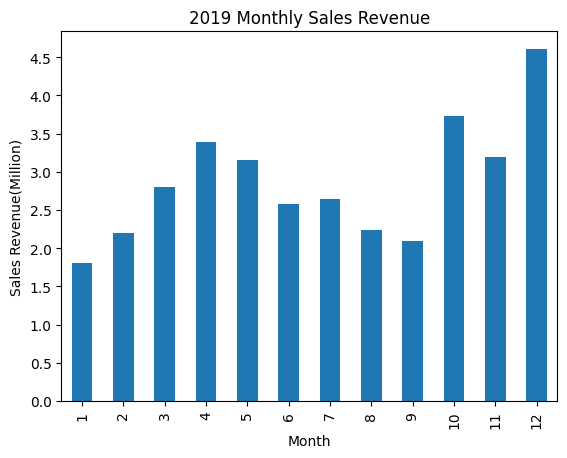

In [4951]:
# Visualizing 2019 monthly sales revenue
month_2019.plot(kind="bar")
y=np.arange(0, 5000000, 500000)
y_ticks=np.arange(0,5,0.5)            
plt.yticks(y, y_ticks) 
plt.xlabel("Month")
plt.ylabel("Sales Revenue(Million)")
plt.title("2019 Monthly Sales Revenue")
plt.show()

**Calculating and Visualizing Proportion of Monthly Sales Revenue**

Proportion of Monthly Sales Revenue in 2019: 
 Month
1      5.26%
2      6.38%
3      8.14%
4      9.84%
5      9.14%
6      7.48%
7      7.68%
8      6.50%
9      6.08%
10    10.84%
11     9.28%
12    13.37%
Name: sales, dtype: object


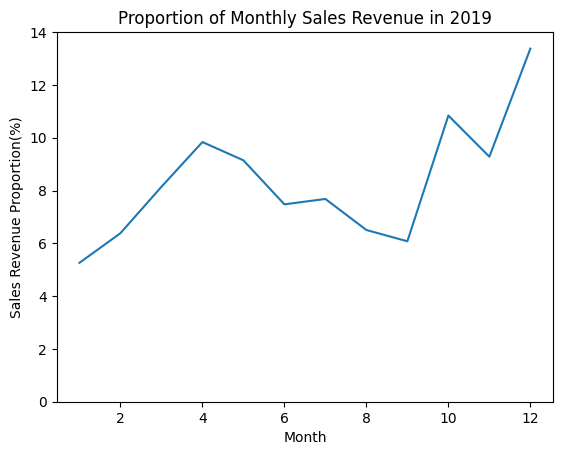

In [4952]:
# Calculating
proportion = month_2019 / month_2019.sum()
print("Proportion of Monthly Sales Revenue in 2019:", "\n",percentage_format(proportion))

# Visualizing
proportion.plot(kind="line")
y=np.arange(0, 0.15, 0.02)
y_ticks=np.arange(0, 15, 2)            
plt.yticks(y, y_ticks) 
plt.xlabel("Month")
plt.ylabel("Sales Revenue Proportion(%)")
plt.title("Proportion of Monthly Sales Revenue in 2019")
plt.show()

**What is the daily sales trend in December 2019 like?**

Daily Sales in December 2019: 
 Day
1     148,123.73
2     149,021.87
3     142,470.46
4     166,577.69
5     155,079.30
6     151,910.47
7     139,530.81
8     142,527.64
9     147,131.29
10    162,820.75
11    146,367.03
12    144,183.16
13    152,767.20
14    141,841.78
15    142,889.73
16    162,970.61
17    157,357.04
18    154,598.77
19    137,732.67
20    160,178.31
21    154,656.88
22    146,928.21
23    152,064.45
24    152,888.82
25    152,268.42
26    143,896.20
27    126,604.07
28    133,601.53
29    156,009.67
30    151,857.82
31    131,439.32
Name: sales, dtype: object

-------------------------------------------------------------------------------------------



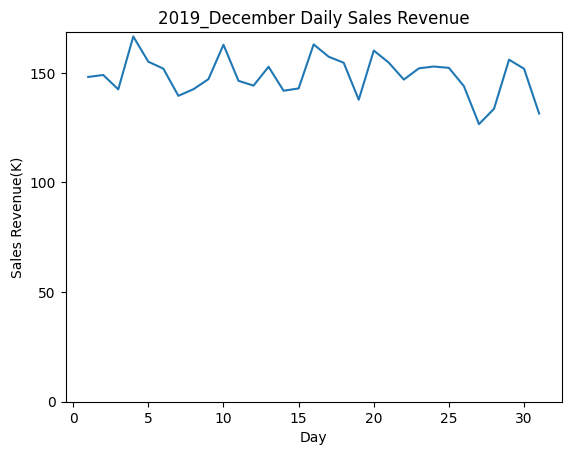

In [4953]:
# Calculating
df_2019_dec = df_2019[df_2019["Month"] == 12] #filtering December sales data
december_rev = df_2019_dec.groupby("Day")["sales"].sum()
print("Daily Sales in December 2019:", "\n",thousand_sep(december_rev))
print_divider()

# Visualizing
december_rev.plot(kind="line")
y=np.arange(0, 200000, 50000)
y_ticks=np.arange(0,200,50)            
plt.yticks(y, y_ticks) 
plt.xlabel("Day")
plt.ylabel("Sales Revenue(K)")
plt.title("2019_December Daily Sales Revenue")
plt.show()

## 2019 Products Overview & Vizualization

### Product Sales Ｖolume and Revenue

In [4954]:
# Create a table containg the amount and proportion of product orders and product sales revenue 
product_sales = (
     df_2019.groupby("Product")[["Quantity Ordered", "sales"]]
    .sum()
    .sort_values(by="sales", ascending=False) # order by sales revenue
)

product_sales["quantity_pro"] = percentage_format(
    product_sales["Quantity Ordered"] / product_sales["Quantity Ordered"].sum()
)
product_sales["sales_pro"] = percentage_format(
    product_sales["sales"] / product_sales["sales"].sum()
)
display(product_sales)


,Quantity Ordered,sales,quantity_pro,sales_pro
Product,,,,
Macbook Pro Laptop,4724,8030800.00,2.26%,23.31%
iPhone,6845,4791500.00,3.28%,13.91%
ThinkPad Laptop,4126,4125958.74,1.98%,11.97%
Google Phone,5528,3316800.00,2.65%,9.63%
27in 4K Gaming Monitor,6238,2432757.62,2.99%,7.06%
34in Ultrawide Monitor,6191,2352518.09,2.97%,6.83%
Apple Airpods Headphones,15632,2344800.00,7.49%,6.81%
Flatscreen TV,4812,1443600.00,2.31%,4.19%
Bose SoundSport Headphones,13427,1342565.73,6.43%,3.90%


### During which month did the top three products achieve the highest sales?

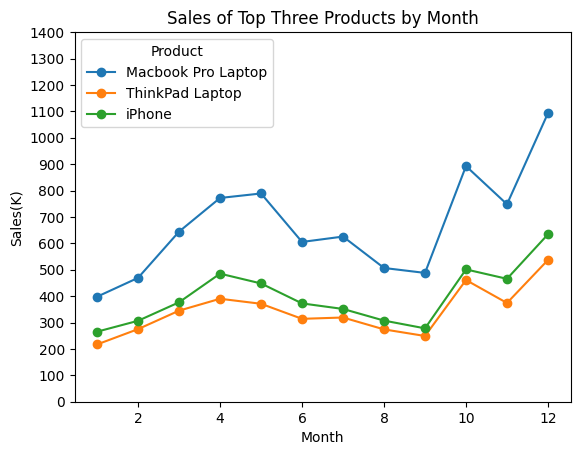

In [4955]:
top_3_products = ["Macbook Pro Laptop", "iPhone", "ThinkPad Laptop"]
df_top3 = df_2019[df_2019["Product"].isin(top_3_products)]
grp_top3 = df_top3.groupby(["Product", "Month"])["sales"].sum().unstack(level=0)#The unstack method is then applied to reshape the resulting DataFrame, so that each product becomes a separate column.

# Visualizing 
grp_top3.plot(kind="line", marker="o")
y=np.arange(0, 1500000, 100000)
y_ticks=np.arange(0,1500,100)            
plt.yticks(y, y_ticks) 
plt.xlabel("Month")
plt.ylabel("Sales(K)")
plt.title("Sales of Top Three Products by Month")
plt.legend(title="Product")
plt.show()

## 2019 Geographic Sales Overview & Visualization

### Which state or city recorded the highest number of sales?

In [4956]:
# Check the 'Purchase Address' column
print(df_2019["Purchase Address"].head())

0    136 Church St, New York City, NY 10001
1       562 2nd St, New York City, NY 10001
2      277 Main St, New York City, NY 10001
3       410 6th St, San Francisco, CA 94016
4             43 Hill St, Atlanta, GA 30301
Name: Purchase Address, dtype: object


In [4957]:
# Extracting the state abbreviations from 'Purchase Address' column
df_2019.loc[:, "state"] = df_2019["Purchase Address"].str[-8:-6]

# Check the outcome
print("States:", "\n", df_2019["state"].unique())
print_divider()
print("Purchase Address Recheck:", "\n",df_2019["Purchase Address"].head()) # Ensuring the local dataframe remains unchanged during calculations

States: 
 ['NY' 'CA' 'GA' 'OR' 'TX' 'MA' 'ME' 'WA']

-------------------------------------------------------------------------------------------

Purchase Address Recheck: 
 0    136 Church St, New York City, NY 10001
1       562 2nd St, New York City, NY 10001
2      277 Main St, New York City, NY 10001
3       410 6th St, San Francisco, CA 94016
4             43 Hill St, Atlanta, GA 30301
Name: Purchase Address, dtype: object


States Sales Revenue in 2019: 
 state
CA    13,699,518.05
NY     4,660,122.68
TX     4,581,041.37
MA     3,657,300.76
GA     2,793,819.08
WA     2,744,896.03
OR     1,869,842.59
ME       449,321.38
Name: sales, dtype: object


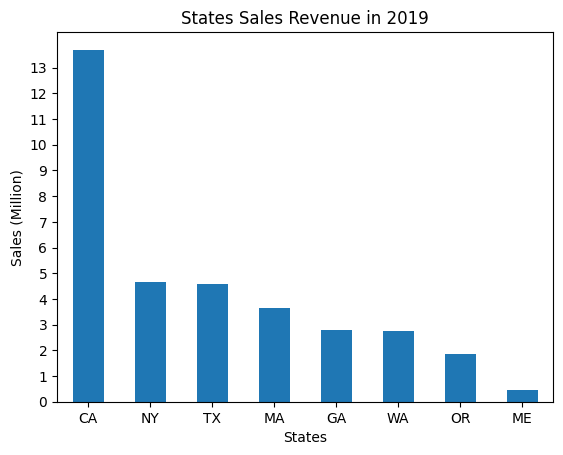

In [4958]:
# Calculating the state sales revenue
state_sales = df_2019.groupby("state")["sales"].sum().sort_values(ascending=False)
print("States Sales Revenue in 2019:", "\n", thousand_sep(state_sales))

# Visualizing
state_sales.plot(kind="bar")
y=np.arange(0, 14000000, 1000000)
y_ticks=np.arange(0,14,1)            
plt.yticks(y, y_ticks) 
plt.xlabel("States")
plt.ylabel("Sales (Million)")
plt.title("States Sales Revenue in 2019")
plt.xticks(rotation=0)
plt.show()

In [4959]:
# Extracting the cities from 'Purchase Address' column
df_2019["city"] = df_2019["Purchase Address"].str.split(",").str[1]
print("Cities:", "\n",df_2019["city"].unique())

Cities: 
 [' New York City' ' San Francisco' ' Atlanta' ' Portland' ' Dallas'
 ' Los Angeles' ' Boston' ' Austin' ' Seattle']


Cities Sales Revenue in 2019: 
 city
 San Francisco    8,252,219.74
 Los Angeles      5,447,298.31
 New York City    4,660,122.68
 Boston           3,657,300.76
 Atlanta          2,793,819.08
 Dallas           2,763,509.01
 Seattle          2,744,896.03
 Portland         2,319,163.97
 Austin           1,817,532.36
Name: sales, dtype: object


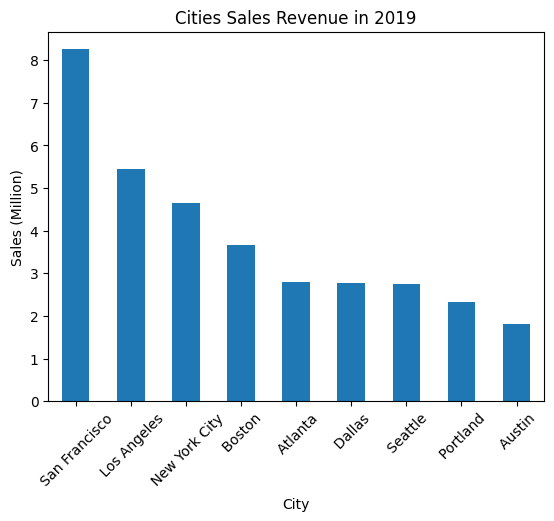

In [4960]:
# Calculating the cities sales revenue
city_sales = df_2019.groupby("city")["sales"].sum().sort_values(ascending=False)
print("Cities Sales Revenue in 2019:", "\n", thousand_sep(city_sales))

# Visualizing
city_sales.plot(kind="bar")
y=np.arange(0, 9000000, 1000000)
y_ticks=np.arange(0,9,1)            
plt.yticks(y, y_ticks) 
plt.xlabel("City")
plt.ylabel("Sales (Million)")
plt.title("Cities Sales Revenue in 2019")
plt.xticks(rotation=45)
plt.show()

## What time should we display adverstisement to maximize likelihood of customer's buying product?

In [4961]:
# Create a 'time' column to indicate the hour of purchase
df_2019["time"] = df_2019["Order Date"].dt.hour
df_2019["time"] = df_2019["time"].astype(int)

# Check the 'time' column
print(df_2019["time"].head())


0     0
1     7
2    18
3    15
4    12
Name: time, dtype: int64


Top Three Sales Time Periods with the Highest Revenue: 
 time
19    2,411,571.14
12    2,314,359.85
11    2,296,619.84
Name: sales, dtype: object


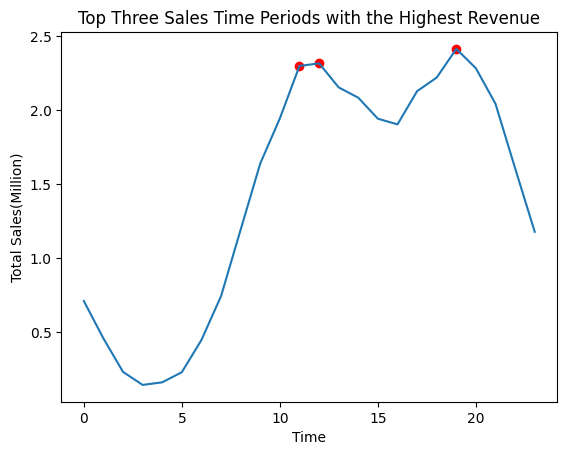

In [4962]:
# Calculation
ad_time = df_2019.groupby("time")["sales"].sum()

# Visualizing

y=np.arange(0, 3000000, 500000)
y_ticks=np.arange(0,3,0.5)            
plt.yticks(y, y_ticks) 
ad_time.plot(kind="line")
plt.xlabel("Time")
plt.ylabel("Total Sales(Million)")
plt.title("Top Three Sales Time Periods with the Highest Revenue")


# Get the top three sales points
top_three_indices = ad_time.sort_values(ascending=False).head(3).index
top_three_sales = ad_time[top_three_indices]
print("Top Three Sales Time Periods with the Highest Revenue:", "\n", thousand_sep(top_three_sales))

plt.scatter(top_three_indices, top_three_sales, color="red", marker="o") # Utilize a scatter plot to highlight the time with the highest sales
plt.show()

## What products are most often sold together?

In [4963]:
# Group orders by Order ID and collect the products in each order
order_groups = df_2019.groupby("Order ID")["Product"].apply(
    list
)  # apply(list) applies the list function to each group, converting the products of each order into a list. The apply method is used to apply a function (in this case, list) to each group separately.

# Filter the order_groups to include only lists with 2 or more elements
filtered_order_groups = order_groups[order_groups.apply(lambda x: len(x) >= 2)]
print("Count of Orders with Product Combinations:", len(filtered_order_groups))
print_divider()

# Check the product conbination
print("Product Combination in Orders:","\n", filtered_order_groups.head())


Count of Orders with Product Combinations: 6876

-------------------------------------------------------------------------------------------

Product Combination in Orders: 
 Order ID
141275             [USB-C Charging Cable, Wired Headphones]
141290    [Apple Airpods Headphones, AA Batteries (4-pack)]
141365                  [Vareebadd Phone, Wired Headphones]
141384                 [Google Phone, USB-C Charging Cable]
141450           [Google Phone, Bose SoundSport Headphones]
Name: Product, dtype: object


In [4964]:
# Answer "What products are most often sold together?"
print("Top 5 Product Sales Combinations:","\n",  filtered_order_groups.value_counts().head())

Top 5 Product Sales Combinations: 
 Product
[iPhone, Lightning Charging Cable]         885
[Google Phone, USB-C Charging Cable]       857
[iPhone, Wired Headphones]                 361
[Vareebadd Phone, USB-C Charging Cable]    312
[Google Phone, Wired Headphones]           303
Name: count, dtype: int64
